In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


In [9]:
list =np.array([
[2,3,0]
,[4,5,0]
,[11,11,1]
,[4,11,1]
,[12,5,0]
,[5,2,0]
,[6,1,0]
,[2,10,1]
,[4,7,1]
,[13,8,0]
,[1,6,1]
,[6,9,1]
,[10,12,1]
,[8,3,0]
,[2,8,1]])


In [10]:
input= pd.DataFrame({'x1':list[:,0],'x2':list[:,1],'class':list[:,2]})
input.head()

,x1,x2,class
0,2,3,0
1,4,5,0
2,11,11,1
3,4,11,1
4,12,5,0


In [3]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights 
def train_weights(train, l_rate, n_epoch):
	weights = [0.1 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error =  row[-1] - prediction
			sum_error += error
			if error != 0:
			    weights[0] = weights[0] + l_rate * error
			    for i in range(len(row)-1):
				    weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
		print (weights)
		#if sum_error == 0 and epoch>1:
		#	break
	return weights
 
# Calculate weights
dataset = [
[2,3,0]
,[4,5,0]
,[11,11,1]
,[4,11,1]
,[12,5,0]
,[5,2,0]
,[6,1,0]
,[2,10,1]
,[4,7,1]
,[13,8,0]
,[1,6,1]
,[6,9,1]
,[10,12,1]
,[8,3,0]
,[2,8,1]]
l_rate = 0.01
n_epoch = 130
weightsa = train_weights(dataset, l_rate, n_epoch)
print(weightsa)

>epoch=0, lrate=0.010, error=-2.000
[0.08000000000000002, -0.059999999999999984, 0.07]
>epoch=1, lrate=0.010, error=-1.000
[0.07000000000000002, -0.08999999999999998, 0.10000000000000002]
>epoch=2, lrate=0.010, error=-1.000
[0.06000000000000002, -0.11999999999999998, 0.13]
>epoch=3, lrate=0.010, error=-1.000
[0.05000000000000002, -0.14999999999999997, 0.16000000000000003]
>epoch=4, lrate=0.010, error=-1.000
[0.040000000000000015, -0.16999999999999998, 0.2]
>epoch=5, lrate=0.010, error=-1.000
[0.030000000000000013, -0.19, 0.24000000000000002]
>epoch=6, lrate=0.010, error=-1.000
[0.02000000000000001, -0.17, 0.31]
>epoch=7, lrate=0.010, error=-2.000
[1.0408340855860843e-17, -0.23, 0.23000000000000004]
>epoch=8, lrate=0.010, error=-1.000
[-0.00999999999999999, -0.27, 0.23000000000000004]
>epoch=9, lrate=0.010, error=0.000
[-0.00999999999999999, -0.21000000000000005, 0.35000000000000003]
>epoch=10, lrate=0.010, error=-2.000
[-0.029999999999999992, -0.29000000000000004, 0.30000000000000004]


In [34]:
# Make a prediction with weights
def predict(row, weights):
	activation = 0.0
	activation += weights[0]
	for i in range(len(row)-1):
		activation += weights[i+1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights using gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0 for i in range(len(train[0]))]
	
	for epoch in range(n_epoch):
		del_weights = [0 for i in range(len(train[0]))]
		sum_error = 0.0
		p = 0
		for row in train:
			prediction = predict(row, weights)
			p +=prediction
			error = row[-1] - prediction
			sum_error += error
			del_weights[0] = del_weights[0] + l_rate * error
			for i in range(len(row)-1):
				del_weights[i + 1] = del_weights[i + 1] + l_rate * error * row[i]
		weights[0] += del_weights[0]
		weights[1] += del_weights[1]
		weights[2] += del_weights[2]
		#print(del_weights,weights)
		print('>epoch=%d, lrate=%.3f, error=%.3f, pred=%.3f' % (epoch, l_rate, sum_error,p))
	return weights

# Calculate weights
dataset = [
[2,3,0]
,[4,5,0]
,[11,11,1]
,[4,11,1]
,[12,5,0]
,[5,2,0]
,[6,1,0]
,[2,10,1]
,[4,7,1]
,[13,8,0]
,[1,6,1]
,[6,9,1]
,[10,12,1]
,[8,3,0]
,[2,8,1]]
l_rate = 0.1
n_epoch = 100
weightsb = train_weights(dataset, l_rate, n_epoch)
#print(2*weightsb[1]+3*weightsb[2]+weightsb[0],predict([2,3,0],weightsb))
#print(1*weightsb[1]+6*weightsb[2]+weightsb[0],predict([1,6,1],weightsb))
print(weightsb)

>epoch=0, lrate=0.100, error=-7.000, pred=15.000
>epoch=1, lrate=0.100, error=8.000, pred=0.000
>epoch=2, lrate=0.100, error=-6.000, pred=14.000
>epoch=3, lrate=0.100, error=4.000, pred=4.000
>epoch=4, lrate=0.100, error=-5.000, pred=13.000
>epoch=5, lrate=0.100, error=3.000, pred=5.000
>epoch=6, lrate=0.100, error=-3.000, pred=11.000
>epoch=7, lrate=0.100, error=-2.000, pred=10.000
>epoch=8, lrate=0.100, error=1.000, pred=7.000
>epoch=9, lrate=0.100, error=-3.000, pred=11.000
>epoch=10, lrate=0.100, error=-1.000, pred=9.000
>epoch=11, lrate=0.100, error=-1.000, pred=9.000
>epoch=12, lrate=0.100, error=-2.000, pred=10.000
>epoch=13, lrate=0.100, error=-1.000, pred=9.000
>epoch=14, lrate=0.100, error=-2.000, pred=10.000
>epoch=15, lrate=0.100, error=1.000, pred=7.000
>epoch=16, lrate=0.100, error=-3.000, pred=11.000
>epoch=17, lrate=0.100, error=1.000, pred=7.000
>epoch=18, lrate=0.100, error=-3.000, pred=11.000
>epoch=19, lrate=0.100, error=-1.000, pred=9.000
>epoch=20, lrate=0.100, er

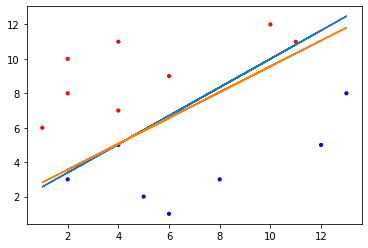

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==1:
            cols.append('red')
        elif l==0:
            cols.append('blue')
    return cols
# Create the colors list using the function above
cols=pltcolor(list[:,2])


plt.scatter(list[:,0], list[:,1], c=cols, s=10, cmap='gray')

a = weightsa # weights from perceptrom training
b = weightsb # weights from 
ma =  -1 * a[1]/a[2]
ba =  -1 * a[0]/a[2]


mb =  -1 * b[1]/b[2]
bb =  -1 * b[0]/b[2]
x = list[:,0]
plt.plot(x, ma*x + ba)
plt.plot(x, mb*x + bb)
plt.show()

# 2 lines, one for each training method

In [7]:
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header = None)


Using TensorFlow backend.


In [8]:
data.head()
data.loc[data[4]=="Iris-setosa",4]=0
data.loc[data[4]=="Iris-versicolor",4]=1
data.loc[data[4]=="Iris-virginica",4]=2
X=data.iloc[:,0:4].values
y=data.iloc[:,4].values


X_normalized=normalize(X,axis=0)

total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)



In [11]:
model1=Sequential()
model1.add(Dense(100,input_dim=4,activation='relu')) #one hidden layer with 100 neurons
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model1.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=200,verbose=1)

prediction=model1.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

 val_loss: 1.1849 - val_accuracy: 0.0000e+00
Epoch 67/200
120/120 [==============================] - 0s 298us/step - loss: 0.5960 - accuracy: 0.8333 - val_loss: 1.1643 - val_accuracy: 0.0000e+00
Epoch 68/200
120/120 [==============================] - 0s 302us/step - loss: 0.5886 - accuracy: 0.8333 - val_loss: 1.1629 - val_accuracy: 0.0000e+00
Epoch 69/200
120/120 [==============================] - 0s 331us/step - loss: 0.5821 - accuracy: 0.8333 - val_loss: 1.1676 - val_accuracy: 0.0000e+00
Epoch 70/200
120/120 [==============================] - 0s 390us/step - loss: 0.5761 - accuracy: 0.8333 - val_loss: 1.1568 - val_accuracy: 0.0000e+00
Epoch 71/200
120/120 [==============================] - 0s 346us/step - loss: 0.5699 - accuracy: 0.8333 - val_loss: 1.1375 - val_accuracy: 0.0000e+00
Epoch 72/200
120/120 [==============================] - 0s 327us/step - loss: 0.5634 - accuracy: 0.8333 - val_loss: 1.1341 - val_accuracy: 0.0000e+00
Epoch 73/200
120/120 [==============================] -

Accuracy of the dataset 60.0


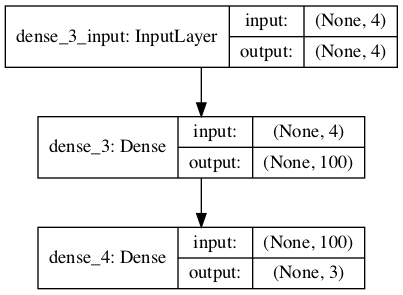

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
model2=Sequential()
model2.add(Dense(9,input_dim=4,activation='relu')) # one hidden layes with 9 neurons
model2.add(Dense(3,activation='relu')) # one hidden layes with 3 neurons
#model2.add(Dropout(0.2))
model2.add(Dense(3,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=200,verbose=1)

prediction=model2.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )


=] - 0s 490us/step - loss: 1.0424 - accuracy: 0.4167 - val_loss: 1.4486 - val_accuracy: 0.0000e+00
Epoch 69/200
120/120 [==============================] - 0s 548us/step - loss: 1.0420 - accuracy: 0.4167 - val_loss: 1.4517 - val_accuracy: 0.0000e+00
Epoch 70/200
120/120 [==============================] - 0s 419us/step - loss: 1.0418 - accuracy: 0.4167 - val_loss: 1.4557 - val_accuracy: 0.0000e+00
Epoch 71/200
120/120 [==============================] - 0s 475us/step - loss: 1.0415 - accuracy: 0.4167 - val_loss: 1.4594 - val_accuracy: 0.0000e+00
Epoch 72/200
120/120 [==============================] - 0s 404us/step - loss: 1.0412 - accuracy: 0.4167 - val_loss: 1.4634 - val_accuracy: 0.0000e+00
Epoch 73/200
120/120 [==============================] - 0s 456us/step - loss: 1.0409 - accuracy: 0.4167 - val_loss: 1.4673 - val_accuracy: 0.0000e+00
Epoch 74/200
120/120 [==============================] - 0s 424us/step - loss: 1.0405 - accuracy: 0.4167 - val_loss: 1.4708 - val_accuracy: 0.0000e+00
E

Accuracy of the dataset 0.0


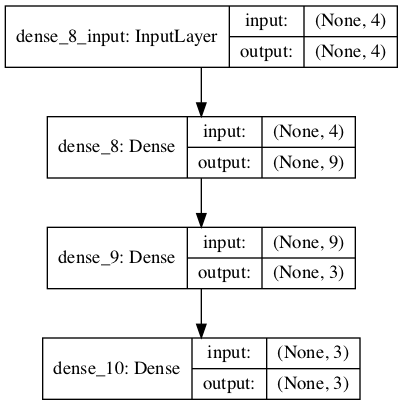

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


3

0
1


In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
print(1)
plt.style.use("ggplot")
plt.figure()

1


<Figure size 432x288 with 0 Axes>